In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import csv
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
BASE_PATH = '/home/diam/Desktop/WBC_Test_Images/'

In [3]:
def get_filename_for_index(index):
    PREFIX = 'Original_Images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'

In [5]:
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

In [6]:
for row in reader:
    label = row[2]
    if len(label) > 0:
        filename = get_filename_for_index(row[1])
        img_file = cv2.imread(BASE_PATH + filename)
        if img_file is not None:
            img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
            img_file = scipy.misc.imresize(arr=img_file, size=(240, 320, 3))
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)
        else:
            print("No file found", BASE_PATH + filename)


X = np.asarray(X)
y = np.asarray(y)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [7]:
##train_test_split from scikit learn. t_t_s(*arrays, **options)
#test_size = if float, should be b/w 0.0-1.0, represents proportion dataset
#included in train size. default = 0.25
#random_state = int (seed). default = NONE.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
##make 4 lists of subset x values for each bc type in the x_train dataset 
poly_samples = X_train[np.where(y_train == 'POLYNUCLEAR')]
poly_samples = np.array(poly_samples)
mono_samples = X_train[np.where(y_train == 'MONONUCLEAR')]
mono_samples = np.array(mono_samples)

In [9]:
poly_augmented = np.array((poly_samples[:])*(6)-7)

poly_augmented_full = np.concatenate((poly_samples, poly_augmented))

###ADDING Y-VALUES

#poly_augmented_full_label = np.zeros(len(poly_augmented_full))
#poly_augmented_full_label[:] = str('POLYNUCLEAR')


# note: 
-  When pulling images from a list, use code above to add y-values to new images, then concatonate. 
-  When pulling images from a folder, save images to labeled folder. Easier method, but could cause complications when switching to alternate truthing methods/data type (multi-class -> continuous). 

samples
252
augmented
252
augmented FULL
504


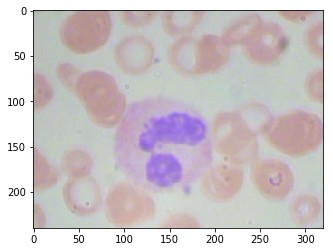

In [14]:
print("samples")
print(len(poly_samples))
print("augmented")
print(len(poly_augmented))
print("augmented FULL")
print(len(poly_augmented_full))
#showing image index '5', random chosen number
#struggling to show list of all 75 images (0-74)
plt.imshow(poly_augmented_full[5])
#plt.imshow(poly_augmented[5])
#plt.show()
